In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from keras.datasets import fashion_mnist
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.regularizers import L2
from keras.optimizers import Adam
import tensorflow as tf 
from sklearn.metrics import classification_report
from keras.utils import to_categorical 


In [2]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
train_res = {}

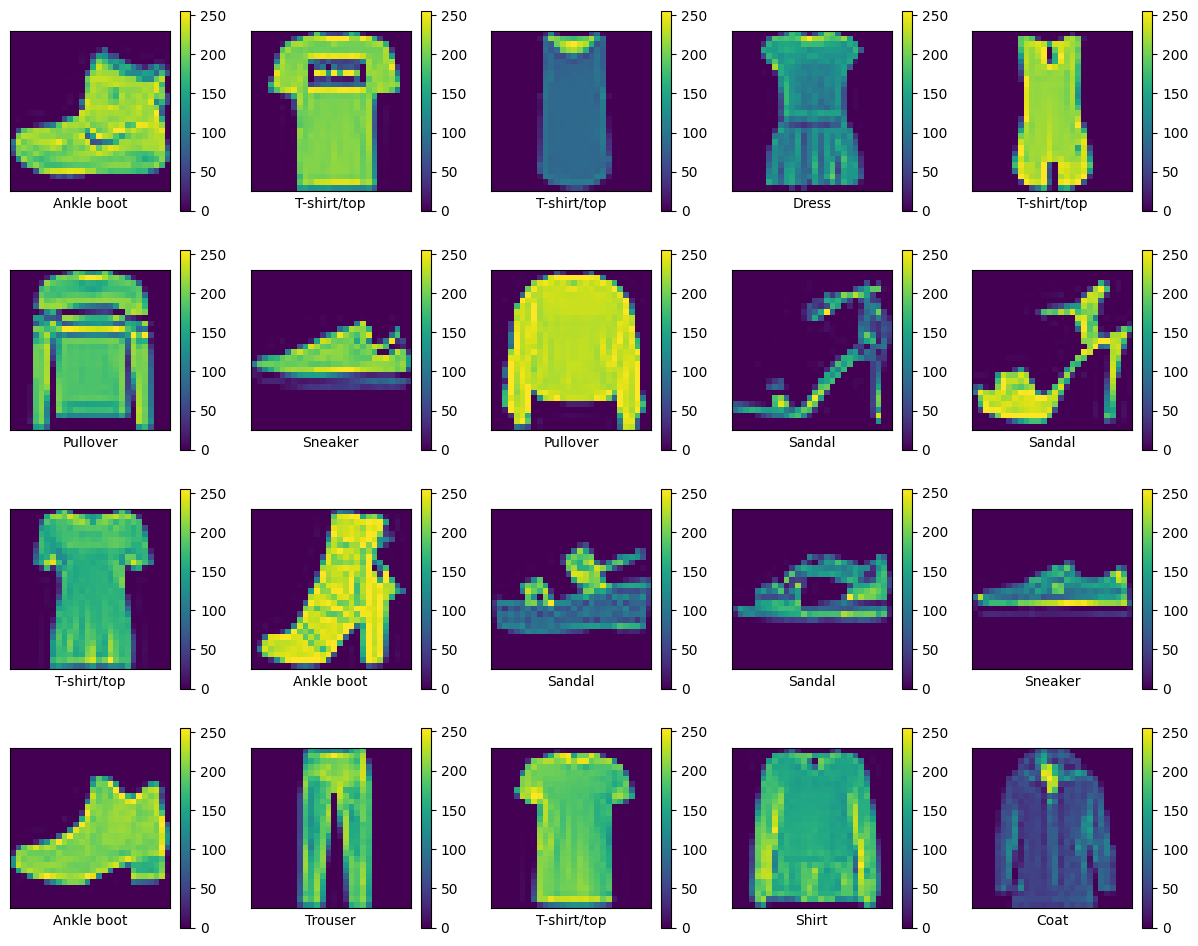

In [5]:
# Sample image
plt.figure(figsize=(15,15))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.colorbar()
    plt.xlabel(labels[train_labels[i]])
plt.show()


In [6]:
# train,val,test
# reshape
# normalize

train_images,train_labels = train_images[10000:],train_labels[10000:]
val_images,val_labels =  train_images[:10000],train_labels[:10000]
print(train_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(val_labels.shape)

train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
val_images = val_images.reshape(val_images.shape[0],val_images.shape[1],val_images.shape[2],1)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)

print(train_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(val_labels.shape)

train_images = train_images/255.0
val_images  = val_images/255.0
test_images = test_images/255.0

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)
(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000,)
(10000,)


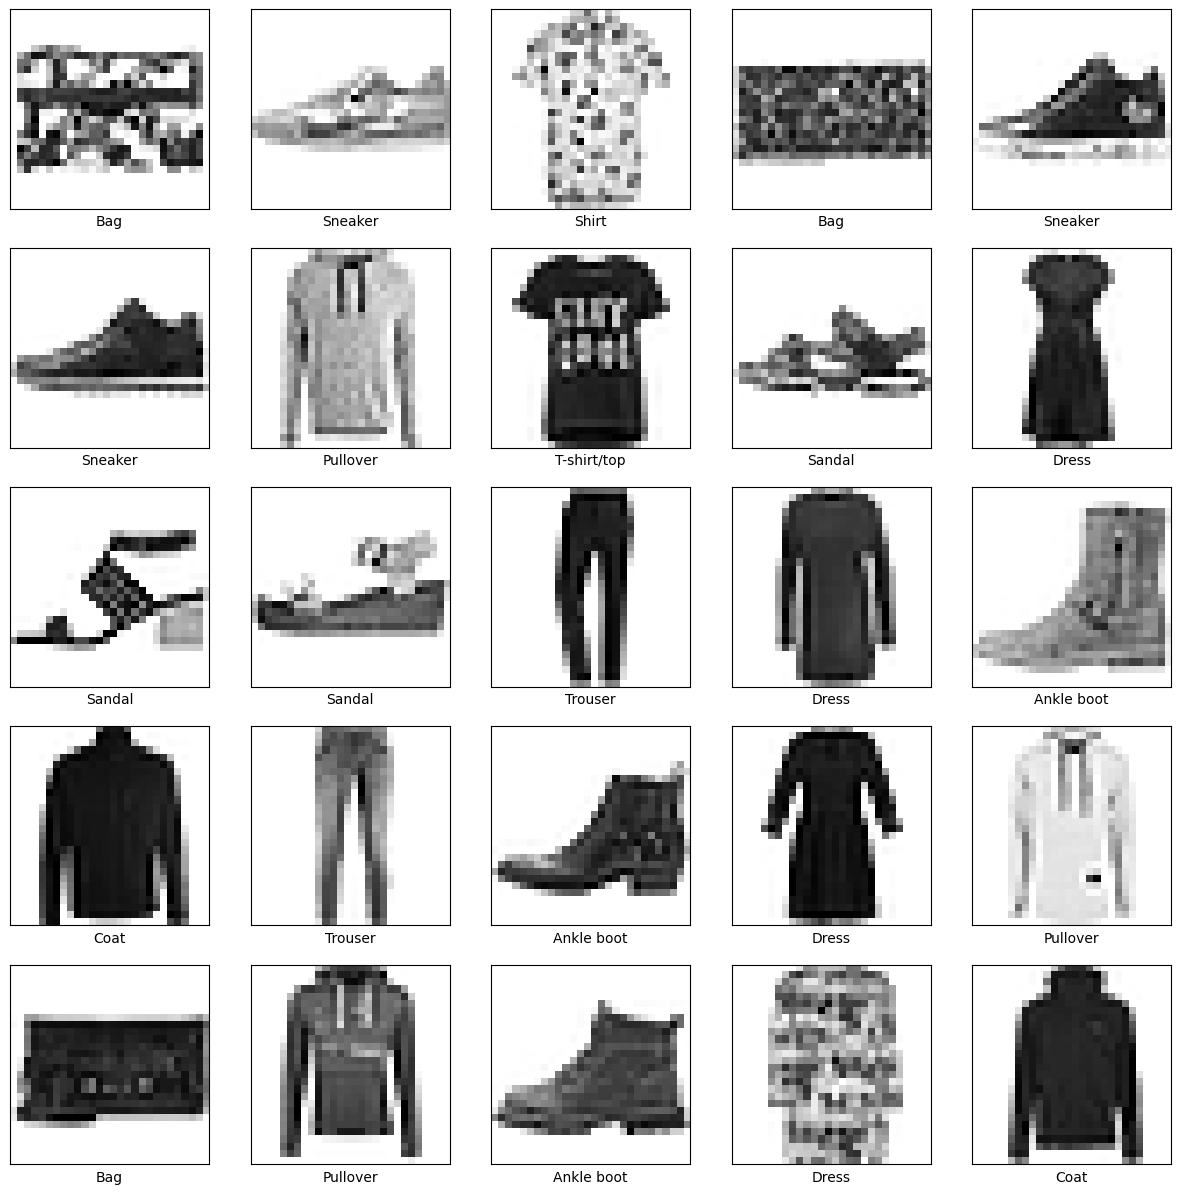

In [7]:
# standartized input images 

plt.figure(figsize=(15,15))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap= plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(labels[train_labels[i]])
plt.show()

In [8]:
from keras.callbacks import TensorBoard,EarlyStopping
logdir = 'logs/'
tensorboard_callback = TensorBoard(log_dir=logdir)
early_callback = EarlyStopping(monitor='val_loss',patience=15)

In [9]:
#model1 : 1conv bn pooling
model1 = Sequential(name='Model1')
model1.add(Conv2D(64,kernel_size=3,activation='relu',input_shape = (28,28,1),))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10,activation='softmax'))

model1.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256  

In [10]:
# model2 : 3conv pooling bn
model2 = Sequential(name='Model2')
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape = (train_images.shape[1:])))
model2.add(BatchNormalization())
model2.add(Conv2D(64,kernel_size=3,activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Conv2D(128,kernel_size=3,activation='relu'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))

model2.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0    

In [11]:
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# training
train_res['Model1'] = model1.fit(train_images,train_labels,validation_data=(val_images,val_labels),batch_size=64,epochs=10,verbose=2)

train_res['Model2'] = model2.fit(train_images,train_labels,validation_data=(val_images,val_labels),batch_size=64,epochs=10,verbose=2)

Epoch 1/10
782/782 - 28s - loss: 0.3661 - accuracy: 0.8704 - val_loss: 0.3067 - val_accuracy: 0.8863 - 28s/epoch - 35ms/step
Epoch 2/10
782/782 - 28s - loss: 0.2458 - accuracy: 0.9102 - val_loss: 0.2046 - val_accuracy: 0.9219 - 28s/epoch - 36ms/step
Epoch 3/10
782/782 - 28s - loss: 0.2016 - accuracy: 0.9263 - val_loss: 0.1655 - val_accuracy: 0.9401 - 28s/epoch - 36ms/step
Epoch 4/10
782/782 - 24s - loss: 0.1682 - accuracy: 0.9382 - val_loss: 0.1264 - val_accuracy: 0.9569 - 24s/epoch - 31ms/step
Epoch 5/10
782/782 - 24s - loss: 0.1431 - accuracy: 0.9485 - val_loss: 0.1196 - val_accuracy: 0.9565 - 24s/epoch - 31ms/step
Epoch 6/10
782/782 - 24s - loss: 0.1233 - accuracy: 0.9544 - val_loss: 0.0884 - val_accuracy: 0.9689 - 24s/epoch - 31ms/step
Epoch 7/10
782/782 - 23s - loss: 0.1028 - accuracy: 0.9640 - val_loss: 0.0986 - val_accuracy: 0.9638 - 23s/epoch - 30ms/step
Epoch 8/10
782/782 - 24s - loss: 0.0878 - accuracy: 0.9682 - val_loss: 0.0652 - val_accuracy: 0.9789 - 24s/epoch - 30ms/step


In [13]:
test_loss_1,test_acc_1 = model1.evaluate(test_images,test_labels,verbose=2)
train_loss_1,train_acc_1 = model1.evaluate(train_images,train_labels,verbose=2)
val_loss_1,val_acc_1 = model1.evaluate(val_images,val_labels,verbose=2)

test_loss_2,test_acc_2 = model2.evaluate(test_images,test_labels,verbose=2)
train_loss_2,train_acc_2 = model2.evaluate(train_images,train_labels,verbose=2)
val_loss_2,val_acc_2 = model2.evaluate(val_images,val_labels,verbose=2)





313/313 - 1s - loss: 0.3261 - accuracy: 0.9104 - 1s/epoch - 4ms/step
1563/1563 - 8s - loss: 0.0472 - accuracy: 0.9846 - 8s/epoch - 5ms/step
313/313 - 2s - loss: 0.0444 - accuracy: 0.9862 - 2s/epoch - 5ms/step
313/313 - 3s - loss: 0.3017 - accuracy: 0.9147 - 3s/epoch - 11ms/step
1563/1563 - 16s - loss: 0.0585 - accuracy: 0.9788 - 16s/epoch - 10ms/step
313/313 - 3s - loss: 0.0545 - accuracy: 0.9808 - 3s/epoch - 10ms/step


In [14]:
from IPython.display import display

df = pd.DataFrame([[train_loss_1*100,val_loss_1*100,test_loss_1*100,train_acc_1,val_acc_1,test_acc_1],
                   [train_loss_2*100,val_loss_2*100,test_loss_2*100,train_acc_2,val_acc_2,test_acc_2]],
                   ['1Conv+ 1FC +pooling','3Conv+1Fc+pooling'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

display(df)

,Train Loss,Validation Loss,Test Loss,Train Acc,Validation Acc,Test Acc
1Conv+ 1FC +pooling,4.724034,4.438951,32.605204,0.98462,0.9862,0.9104
3Conv+1Fc+pooling,5.854687,5.446804,30.170926,0.97876,0.9808,0.9147


In [15]:
# 3Conv + pooling + FC +BN _ dropout
model3 = Sequential([Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)),
                     BatchNormalization(),

                     Conv2D(64,kernel_size=3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Dropout(0,3),
                     
                     Conv2D(128,kernel_size=3,activation='relu'),
                     BatchNormalization(),
                     Dropout(0.5),
                     
                     Flatten(),
                     Dense(128,activation='relu'),
                     BatchNormalization(),
                     Dropout(0.5),
                     Dense(10,activation='softmax')],name='Model3')

model3.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856

In [16]:
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [35]:
train_res['Model3']=model3.fit(train_images,train_labels,validation_data=(val_images,val_labels),epochs=10,batch_size=64,verbose=1,shuffle=True)

Epoch 1/10
782/782 [==============================] - 87s 112ms/step - loss: 0.1464 - accuracy: 0.9470 - val_loss: 0.0824 - val_accuracy: 0.9726
Epoch 2/10
782/782 [==============================] - 88s 113ms/step - loss: 0.1355 - accuracy: 0.9499 - val_loss: 0.0759 - val_accuracy: 0.9727
Epoch 3/10
782/782 [==============================] - 91s 116ms/step - loss: 0.1322 - accuracy: 0.9510 - val_loss: 0.0779 - val_accuracy: 0.9725
Epoch 4/10
782/782 [==============================] - 92s 117ms/step - loss: 0.1243 - accuracy: 0.9549 - val_loss: 0.0597 - val_accuracy: 0.9785
Epoch 5/10
782/782 [==============================] - 90s 115ms/step - loss: 0.1161 - accuracy: 0.9573 - val_loss: 0.0766 - val_accuracy: 0.9729
Epoch 6/10
782/782 [==============================] - 90s 115ms/step - loss: 0.1128 - accuracy: 0.9595 - val_loss: 0.0620 - val_accuracy: 0.9783
Epoch 7/10
782/782 [==============================] - 89s 114ms/step - loss: 0.1052 - accuracy: 0.9610 - val_loss: 0.0495 - val_ac

In [36]:
test_loss_3,test_acc_3  = model3.evaluate(test_images,test_labels,verbose=1)
train_loss_3,train_acc_3 = model3.evaluate(train_images,train_labels,verbose=1)
val_loss_3,val_acc_3 = model3.evaluate(val_images,val_labels,verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.0739 - accuracy: 0.9717


In [37]:
df = pd.DataFrame([[train_loss_3*100,val_loss_3*100,test_loss_3*100,train_acc_3,val_acc_3,test_acc_3],],
                   ['3Conv+1Fc+pooling+dropout'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

display(df)

,Train Loss,Validation Loss,Test Loss,Train Acc,Validation Acc,Test Acc
3Conv+1Fc+pooling+dropout,7.256661,7.388311,26.786616,0.97212,0.9717,0.922


In [23]:
model4 = Sequential([Conv2D(64,kernel_size=3,activation='relu',kernel_regularizer=L2(0.001),input_shape=(28,28,1)),
                     BatchNormalization(),
                     
                     Conv2D(64,kernel_size=3,activation='relu',kernel_regularizer=L2(0.001)),
                     MaxPool2D(pool_size=2),
                     
                     Conv2D(128,kernel_size=3,kernel_regularizer=L2(0.001),activation='relu'),
                     BatchNormalization(),
                     
                     Flatten(),
                     Dense(128,activation='relu'),
                     BatchNormalization(),
                     Dense(10,activation='softmax')],name = 'Model4')

In [24]:
model4.compile(loss = 'sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [25]:
model4.fit(train_images,train_labels,validation_data=(val_images,val_labels),epochs=10,batch_size=64,verbose=1,shuffle=True)

Epoch 1/10
782/782 [==============================] - 73s 92ms/step - loss: 0.4757 - accuracy: 0.8723 - val_loss: 0.3538 - val_accuracy: 0.9038
Epoch 2/10
782/782 [==============================] - 71s 91ms/step - loss: 0.3143 - accuracy: 0.9109 - val_loss: 0.2781 - val_accuracy: 0.9208
Epoch 3/10
782/782 [==============================] - 71s 91ms/step - loss: 0.2554 - accuracy: 0.9269 - val_loss: 0.2280 - val_accuracy: 0.9333
Epoch 4/10
782/782 [==============================] - 72s 93ms/step - loss: 0.2191 - accuracy: 0.9372 - val_loss: 0.2240 - val_accuracy: 0.9338
Epoch 5/10
782/782 [==============================] - 73s 93ms/step - loss: 0.1890 - accuracy: 0.9482 - val_loss: 0.1628 - val_accuracy: 0.9567
Epoch 6/10
782/782 [==============================] - 75s 95ms/step - loss: 0.1682 - accuracy: 0.9542 - val_loss: 0.1519 - val_accuracy: 0.9588
Epoch 7/10
782/782 [==============================] - 74s 95ms/step - loss: 0.1414 - accuracy: 0.9640 - val_loss: 0.1251 - val_accuracy:

In [26]:
test_loss_4,test_acc_4  = model3.evaluate(test_images,test_labels,verbose=1)
train_loss_4,train_acc_4 = model3.evaluate(train_images,train_labels,verbose=1)
val_loss_4,val_acc_4 = model3.evaluate(val_images,val_labels,verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.1018 - accuracy: 0.9633


In [27]:
df = pd.DataFrame([[train_loss_4*100,val_loss_4*100,test_loss_4*100,train_acc_4,val_acc_4,test_acc_4],],
                   ['3Conv+1Fc+pooling+L2'],
                   ['Train Loss','Validation Loss','Test Loss','Train Acc',"Validation Acc",'Test Acc'])

In [38]:
predictions = model3.predict(test_images)
test_labels_vec = to_categorical(test_labels,10)


313/313 [==============================] - 3s 10ms/step


In [39]:
print(classification_report(test_labels_vec.argmax(axis=1),predictions.argmax(axis = 1),target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.83      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.95      0.79      0.86      1000
       Dress       0.94      0.93      0.93      1000
        Coat       0.79      0.95      0.86      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.75      0.81      0.78      1000
     Sneaker       0.98      0.96      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



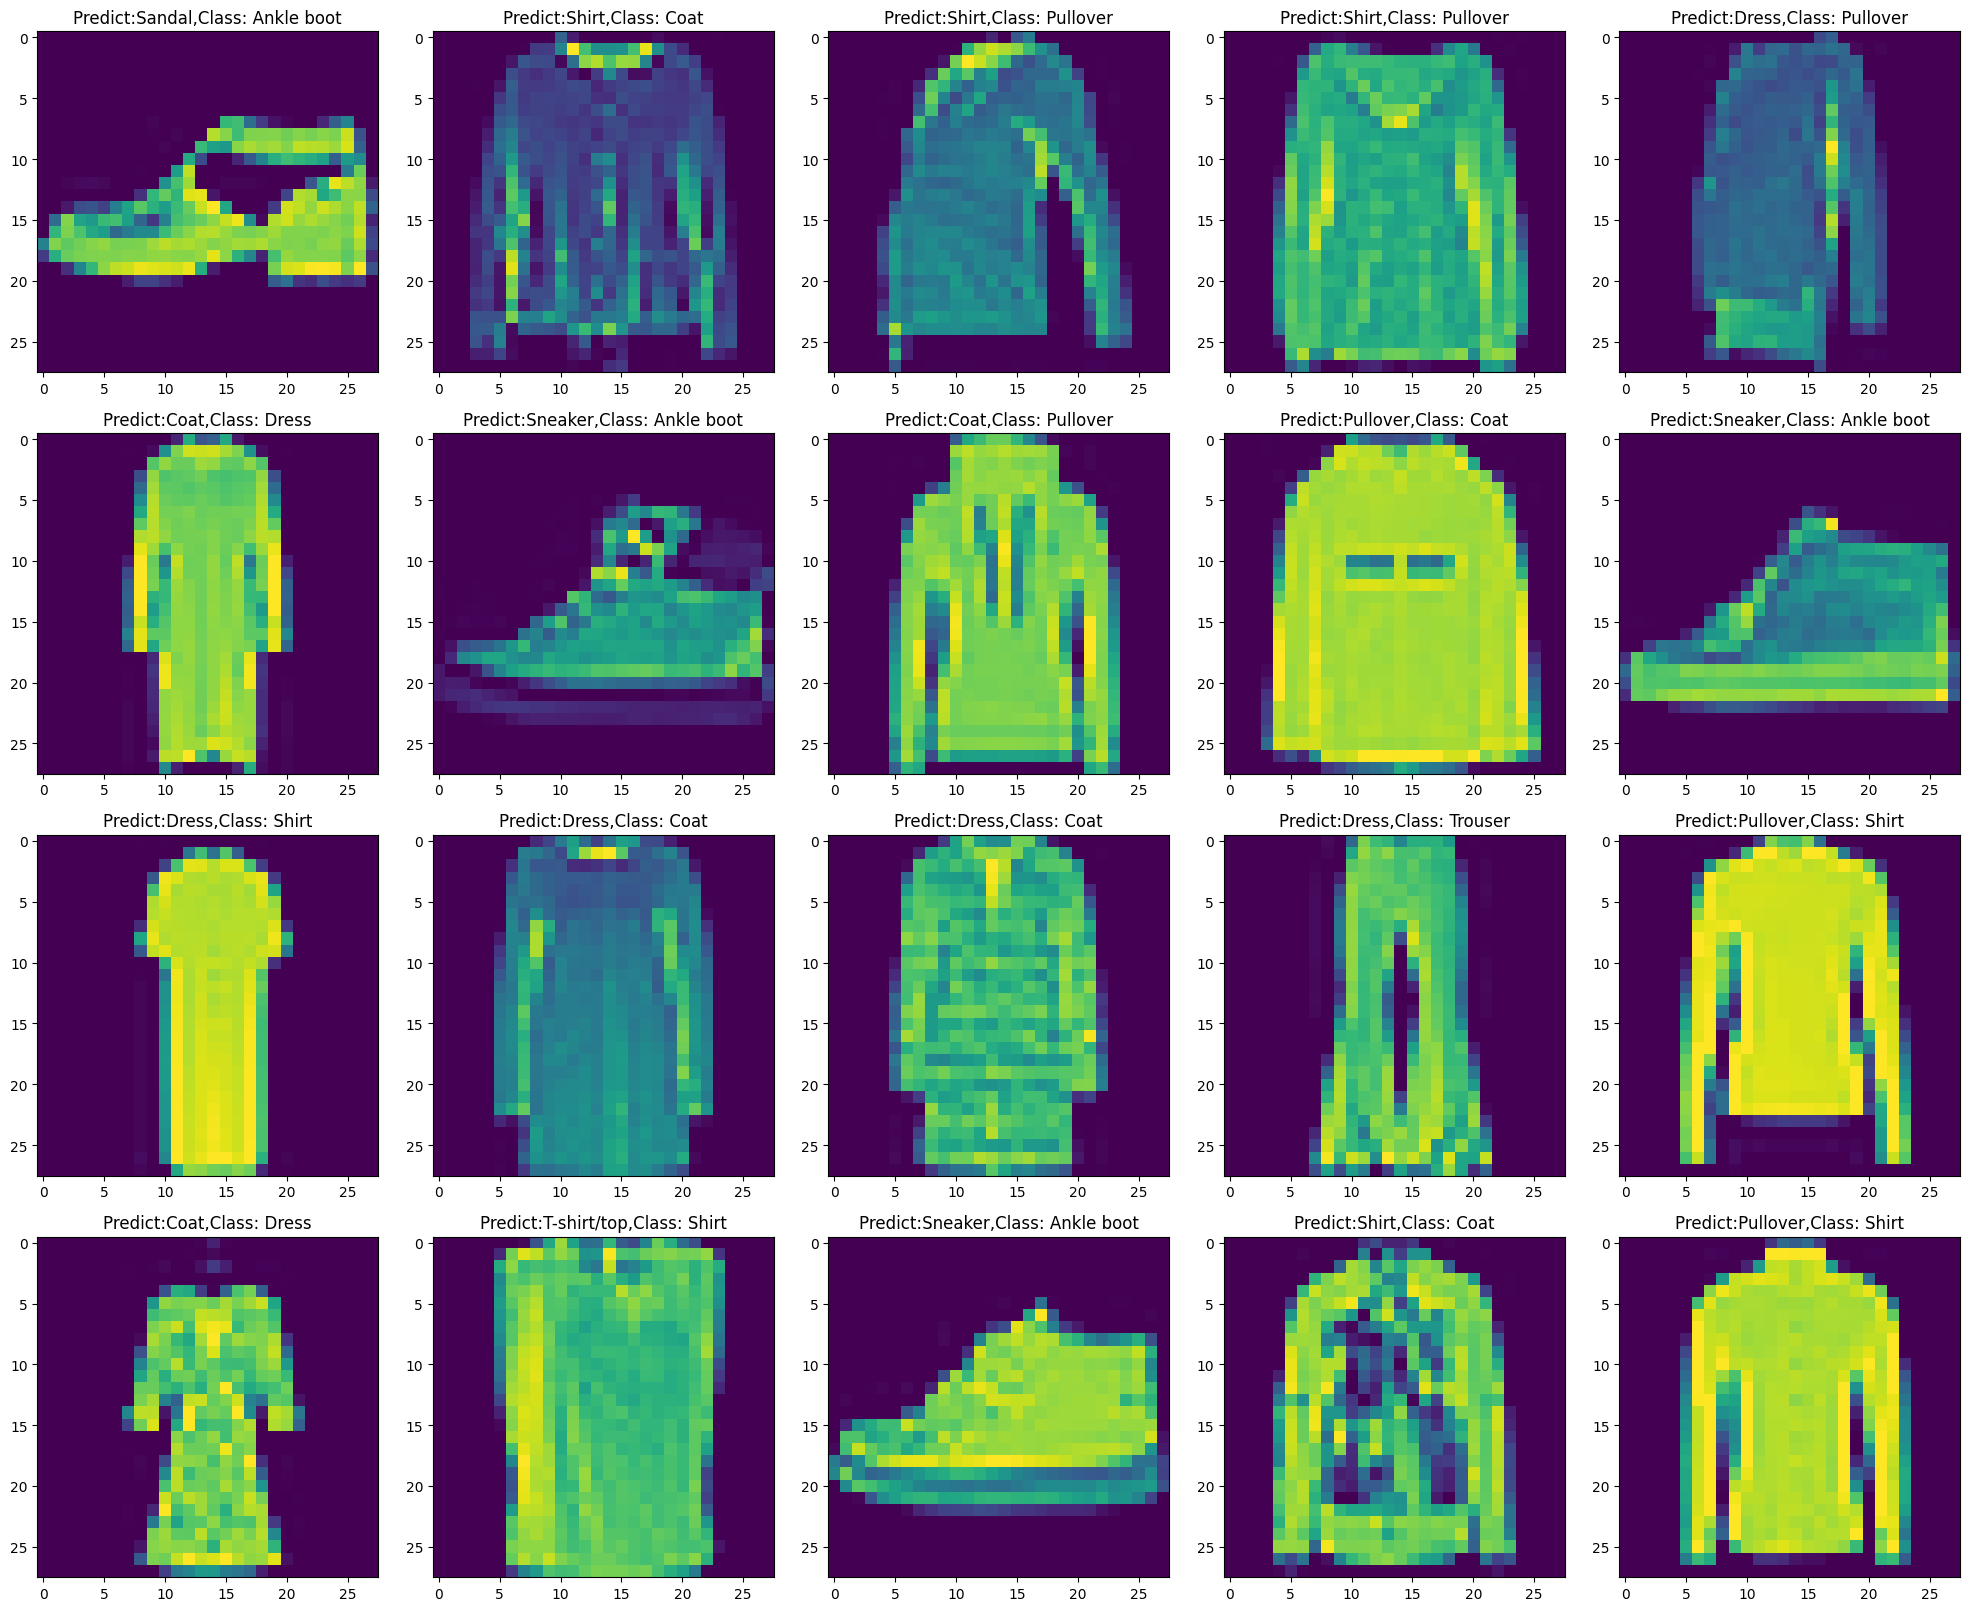

In [32]:
# incorect preiction and real labels 
corrects = np.nonzero(np.argmax(predictions,axis=1) == test_labels) [0]
incorrects = np.nonzero(np.argmax(predictions,axis=1) != test_labels) [0]

plt.figure(figsize=(20,20))
for i ,incorrect in enumerate(incorrects[0:20]):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28))
    plt.title('Predict:{},Class: {}'.format(labels[predictions.argmax(axis = 1)[incorrect]],labels[test_labels_vec.argmax(axis=-1)[incorrect]]))
    plt.tight_layout()
    

In [46]:
# visualize 

%matplotlib inline

def helper_plt(col,val,traning_val,valid_val):
    xy[col].plot(epochs,traning_val,color = 'orange',label = 'Training %s' % val)
    xy[col].plot(epochs,valid_val,color = 'magenta',label = 'Validation %s' % val)
    xy[col].set_title('Training & Validation %s' % val)
    xy[col].legend()
    xy[col].set_xlabel('Epochs')
    xy[col].set_ylabel('Loss')
    xy[col].grid(True)

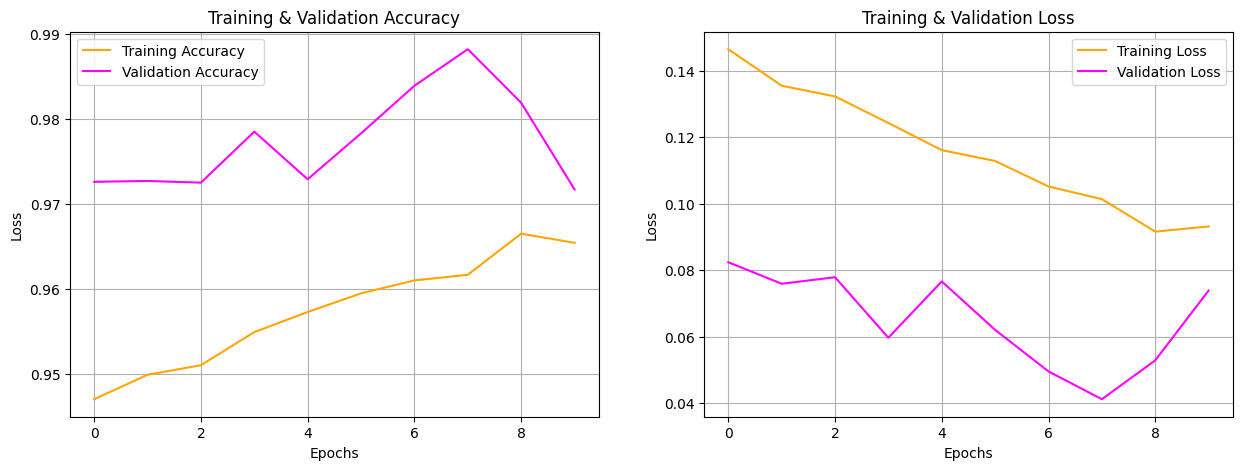

In [47]:
fig, xy = plt.subplots(1,2, figsize=(15, 5))
acc = train_res['Model3'].history['accuracy']
val_accuracy = train_res['Model3'].history['val_accuracy']
train_loss = train_res['Model3'].history['loss']
val_loss = train_res['Model3'].history['val_loss']
epochs = range(len(acc))
helper_plt(0,"Accuracy",acc,val_accuracy)
helper_plt(1,"Loss",train_loss,val_loss)
plt.show()